In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
def inicializarPesos(x):
    w = np.zeros((x.shape[1],1))
    b = 0
    return w,b

def propagacionAdelante(w,b,x):
    z=np.dot(w.T,x.T)+b
    a = 1/(1+np.exp(-z))
    return a

def calcularCosto(y,a,m):
    costo = -np.sum(y*np.log(a)+(1-y)*np.log(1-a))/m 
    return costo

def propagacionAtras(w,b,x,y,a,m):
    dw = np.matmul(x.T,(a-y).T)/m
    db = np.sum(a-y)/m
    w = w-aprendizaje*dw
    b = b-aprendizaje*db
    return w,b

def predecir(w, b, x):
    a=propagacionAdelante(w,b,x)
    yPred = np.zeros((1,x.shape[0]))
    yPred[a>0.5]=1
    return yPred

def calcularExactitud(yPred,y):
    return (100 - np.mean(np.abs(yPred - y)) * 100)

def graficarCostos(costos):
    plt.plot(np.arange(0,len(costos))*100,costos)
    plt.title('Funcion de costo vs iteraciones')
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo (error)')
    plt.show() 


In [88]:
num = int(input("ingresar número de los csv: "))

dfTrain = pd.read_csv("datasets/Entrenamiento{}.csv".format(num))
dfTest = pd.read_csv("datasets/Prueba{}.csv".format(num))
xTrain = dfTrain[dfTrain.columns[0:-1]]
yTrain = dfTrain["category"]
xTest = dfTest[dfTest.columns[0:-1]] 
yTest = dfTest["category"]

xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()
yTrain = yTrain.to_numpy()
yTest = yTest.to_numpy()
yTrain = yTrain.reshape(1,yTrain.shape[0])
yTest = yTest.reshape(1,yTest.shape[0])

ingresar número de los csv:  8


In [89]:
m = xTrain.shape[1]

In [90]:
iteraciones=5001
aprendizaje=0.5
costos = [] 
w,b=inicializarPesos(xTrain)
for i in range(iteraciones):
    a=propagacionAdelante(w,b,xTrain)
    costo=calcularCosto(yTrain,a,m)
    w,b=propagacionAtras(w,b,xTrain,yTrain,a,m)
    if i % 100 == 0:
        costos.append(costo)
        print ("Costo despues de la iteracion {}: {}".format(i, costo)) 

Costo despues de la iteracion 0: 1.9408121055678467
Costo despues de la iteracion 100: 0.4615518238952242
Costo despues de la iteracion 200: 0.33536759490805584
Costo despues de la iteracion 300: 0.27210151969948443
Costo despues de la iteracion 400: 0.23133889754556086
Costo despues de la iteracion 500: 0.2020934545836525
Costo despues de la iteracion 600: 0.17979972371202643
Costo despues de la iteracion 700: 0.16212197791244784
Costo despues de la iteracion 800: 0.14770595953873372
Costo despues de la iteracion 900: 0.13569806396432071
Costo despues de la iteracion 1000: 0.12552725785728389
Costo despues de la iteracion 1100: 0.11679415714277239
Costo despues de la iteracion 1200: 0.10920960668950637
Costo despues de la iteracion 1300: 0.10255837625741976
Costo despues de la iteracion 1400: 0.09667656817136616
Costo despues de la iteracion 1500: 0.0914369617958819
Costo despues de la iteracion 1600: 0.0867391762512879
Costo despues de la iteracion 1700: 0.08250287574733044
Costo des

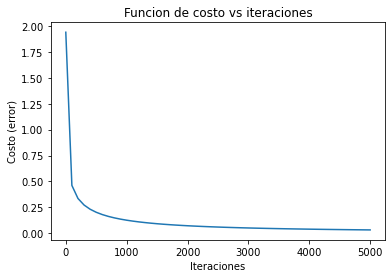

In [91]:
graficarCostos(costos)

In [92]:
yPredTrain = predecir(w,b,xTrain)
exactitudTrain=calcularExactitud(yPredTrain,yTrain)
print("Exactitud: {}%".format(exactitudTrain))

yPredTest = predecir(w,b,xTest)
exactitudTest=calcularExactitud(yPredTest,yTest)
print("Exactitud: {}%".format(exactitudTest))


dfInfo = pd.read_csv("informacion/informacion.csv")
csvEntrenamiento = "Entrenamiento{}".format(num)
cantidadDatosTrain = dfTrain.shape[0]
csvPrueba = "Prueba{}".format(num)
cantidadDatosTest = dfTest.shape[0]
datos = [csvEntrenamiento, cantidadDatosTrain, csvPrueba, cantidadDatosTest, m, iteraciones, aprendizaje, costo,
         exactitudTrain, exactitudTest]
nuevaFila =pd.DataFrame([datos],columns=dfInfo.columns)
dfInfo = dfInfo.append(nuevaFila, ignore_index=True)
dfInfo.to_csv("informacion/informacion.csv",index=False)


dfW=pd.DataFrame(w)
bArray=np.ones((1,1))*b
dfB=pd.DataFrame(bArray)
dfModelo=dfW.append(dfB,ignore_index=True)
dfModelo.to_csv("modelos/modelo{}.csv".format(num), index=False)

Exactitud: 100.0%
Exactitud: 100.0%
